## 深度学习基础及数学原理

### 1. 监督学习及无监督学习

- 监督学习: 通过已有的训练样本(已知输入及输出)去训练一个最优模型(这个模型属于某个函数的集合，最优基于某个给定的评价准则下得到的)，再利用这个模型将后续的输入映射出输出

- 无监督学习: 事先没有任何训练样本，需要直接对数据进行建模

- 半监督学习: 训练时结合大量未标记数据和少量标签数据。

- 强化学习: 设定一个回报函数(reward function),通过这个函数来确认是否越来越接近目标，做对了给与奖励，做错了给与惩罚，最后来达到训练目的。

### 2.线性回归(linear regression) 

- 线性回归是利用数理统计中回归分析，来确定两种或两种以上变量相互依赖的定量关系的一种统计分析方法。其表达式为`y=w'x+e`,e为误差服从均值为0的正态分布。详细可参数[百度百科](https://baike.baidu.com/item/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92/8190345)

In [1]:
import torch
from torch.nn import Linear,Module,MSELoss
from torch.optim import SGD
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns #基于matplotlib的python数据可视化库,提供更高层次的API封装,使用起来更加方便快捷
torch.__version__

'1.1.0'

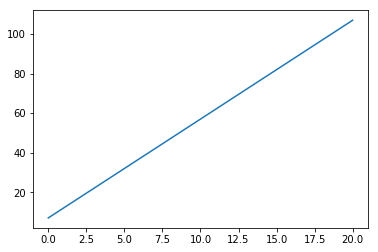

In [2]:
x=np.linspace(0,20,500)
y=5*x+7
plt.plot(x,y)

In [3]:
x=np.random.rand(256)
noise=np.random.randn(256)/4
y=x*5+7+noise
df=pd.DataFrame()
df['x']=x
df['y']=y

/Users/learnzpk/Applications/anaconda2/envs/py3_learn/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


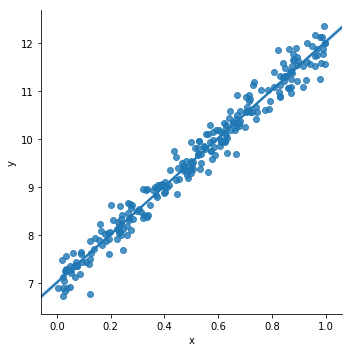

In [4]:
sns.lmplot(x='x',y='y',data=df)

In [21]:
model=Linear(1,1) # feature数量为1
criterion=MSELoss() # 损失函数用均方损失函数
optim=SGD(model.parameters(),lr=0.01)
epochs=4000 #训练3000次

In [22]:
#print(x)
x_train=x.reshape(-1,1).astype('float32')
#print(y)
y_train=y.reshape(-1,1).astype('float32')

In [25]:
for i in range(epochs):
    inputs=torch.from_numpy(x_train)
    labels=torch.from_numpy(y_train)
    outputs=model(inputs)
    # 梯度置零，否则会累加
    optim.zero_grad()
    # 计算损失
    loss=criterion(outputs,labels)
    # 方向传播
    loss.backward()
    # 使用优化器默认方法优化
    optim.step()
    if((i+1)%100==0):
        print('epoch {}, loss {:1.4f}'.format(i+1,loss.data.item()))

epoch 100, loss 0.0567
epoch 200, loss 0.0567
epoch 300, loss 0.0567
epoch 400, loss 0.0567
epoch 500, loss 0.0567
epoch 600, loss 0.0567
epoch 700, loss 0.0567
epoch 800, loss 0.0567
epoch 900, loss 0.0567
epoch 1000, loss 0.0567
epoch 1100, loss 0.0567
epoch 1200, loss 0.0567
epoch 1300, loss 0.0567
epoch 1400, loss 0.0567
epoch 1500, loss 0.0567
epoch 1600, loss 0.0567
epoch 1700, loss 0.0567
epoch 1800, loss 0.0567
epoch 1900, loss 0.0567
epoch 2000, loss 0.0567
epoch 2100, loss 0.0567
epoch 2200, loss 0.0567
epoch 2300, loss 0.0567
epoch 2400, loss 0.0567
epoch 2500, loss 0.0567
epoch 2600, loss 0.0567
epoch 2700, loss 0.0567
epoch 2800, loss 0.0567
epoch 2900, loss 0.0567
epoch 3000, loss 0.0567
epoch 3100, loss 0.0567
epoch 3200, loss 0.0567
epoch 3300, loss 0.0567
epoch 3400, loss 0.0567
epoch 3500, loss 0.0567
epoch 3600, loss 0.0567
epoch 3700, loss 0.0567
epoch 3800, loss 0.0567
epoch 3900, loss 0.0567
epoch 4000, loss 0.0567


In [26]:
# 提取参数
[w,b]=model.parameters()
print(w.item(),b.item())

5.024379253387451 7.005702972412109


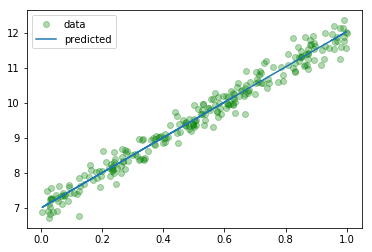

In [29]:
# 预测
predicted=model.forward(torch.from_numpy(x_train)).data.numpy()
plt.plot(x_train,y_train,'go',label='data',alpha=0.3)
plt.plot(x_train,predicted,label='predicted',alpha=1)
plt.legend()
plt.show()

## 3.损失函数

## 4.梯度下降

- mini-batch的梯度下降法: 将大数据集分成小数据集(训练整个数据集很大处理速度很慢，而且通常内存或者显存不足以存放)

- torch.optim.SGD: stochastic gradient descent, 设置了momentum就是带有动量的SGD [梯度下降介绍](https://blog.csdn.net/huplion/article/details/79184338)
     - ```optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)```
     - 普通,波动大:$$W=W-lr*d_W \\ b=b-lr*d_b$$
     - 带momentum: $$V_dW=momentum*V_dW+(1-momentum)d_W \\ V_db=momentum*V_db+(1-momentum)d_b\\ W=W-lr*V_dW \\  b=momentum*b-lr*V_db$$

- torch.optim.RMSprop: root mean square prop [RMSProp详解](https://www.jianshu.com/p/548049548fb9)
     - ```optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99)```

- torch.optim.Adam:将Momentum和RMSprop结合其他的一种下降方法
     - optimizer=torch.optim.Adam(model.parameters(),lr=0.001,betas=(0.9,0.999),eps=1e-08)

## 5.方差/偏差

- 偏差: 度量学习算法的期望预测与真实结果的偏离程序，即模型的拟合能力
- 方差: 度量同样大小的训练集变动所导致的学习性能的变化，即模型的泛化能力
- 高偏差high bias: 一般称为underfitting,意味着模型没有很好的去适配现有的数据，拟合度不够
     - 尝试使用更多的特征
     - 尝试增加多项式特征
     - 尝试减少正则化程度
- 高方差high variance: 一般称为overfitting,意味着模型对现有数据拟合度太高，失去泛化能力。
     - 获取更多的训练数据
     - 尝试减少些特征数量
     - 尝试增加正则化程度

In [32]:
print (5-w.data.item(),7-b.data.item())

-0.024379253387451172 -0.005702972412109375


## 6.正则化

- 通过限制参数值域空间，惩罚模型复杂度，从而避免了过拟合
- L1正则化: 一般损失函数基础上加上权重参数的绝对值 $$L=E_{in}+\lambda{\sum_j} \left|w_j\right|$$
- L2正则化: 一般损失函数基础上加上权重参数的平方和 $$L=E_{in}+\lambda{\sum_j} w^2_j$$
- L1相比于L2会更容易得到稀疏解 [正则化](https://www.zhihu.com/question/37096933)